#### Introduction
The algorithm, given a directed graph and a starting vertex, it will find the shortest paths between the starting vertex and all vertices it can reach. The algorithm only works when the paths have non negative edges connecting the vertices.

Thus, given a graph G = (V, E), a starting vertex s $\in$ V and non negative edges of length $l_e$ where e $\in$ E, the output of the algorithm is dist(s, v) for every vertex v $\in$ V

The dist(s, v) denotes the shortest distance from s to v and dist(s, v) = $\infty$ if there is no path from s to a vertex v.
***
We have seen how BFS can be used to find the shortest path to any vertex from a vertex. This is a special case of graph where each edge has unit length. Djikstra's algorithm is more generic in a way where each edge can have a weight of non positive value.

But can we reduce this graph to a graph where edges are of unit length? That is, if an edge between two vertices have a weight 5, we can replace this edge (with the two vertices) with 5 vertices connected one after other with each edge length of 1 as seen in the following graph



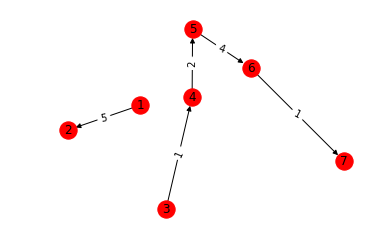

In [70]:
%matplotlib inline
import networkx as nx

DG = nx.DiGraph()
edges = [(1, 2, 5), (3, 4, 1), (4, 5, 2), (5, 6, 4), (6, 7, 1)]
DG.add_weighted_edges_from(edges)
pos = nx.spring_layout(DG,k=0.55,iterations=20)
   # k controls the distance between the nodes and varies between 0 and 1
    # iterations is the number of times simulated annealing is run
    # default k =0.1 and iterations=50
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos=pos,  edge_labels = weights)
nx.draw(DG, pos=pos, with_labels = True)

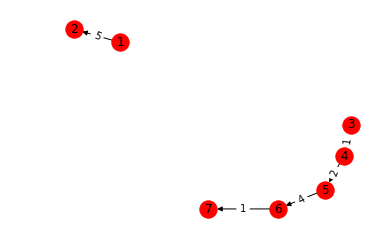

In [72]:
pos = nx.spring_layout(DG)    # spring_layout randomness causes pos to be random
nx.draw_networkx_edge_labels(DG, pos=pos,  edge_labels = weights)
nx.draw(DG, pos=pos, with_labels = True)

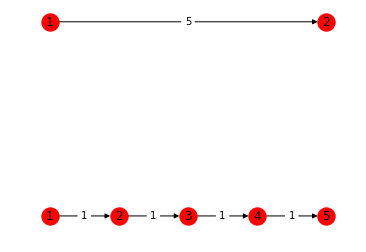

In [21]:
%matplotlib inline
import networkx as nx

g1 = nx.DiGraph()
g1.add_node(1, pos = (0, 5))
g1.add_node(2, pos = (20, 5))
g1.add_edge(1, 2, weight = 5)
pos = nx.get_node_attributes(g1, 'pos')
weights =nx.get_edge_attributes(g1, 'weight')
nx.draw_networkx_edge_labels(g1, pos, edge_labels = weights)
nx.draw(g1, pos, with_labels = True)

g2 = nx.DiGraph()
g2.add_node(1, pos = (0, 0))
g2.add_node(2, pos = (5, 0))
g2.add_node(3, pos = (10, 0))
g2.add_node(4, pos = (15, 0))
g2.add_node(5, pos = (20, 0))
g2.add_edge(1, 2, weight = 1)
g2.add_edge(2, 3, weight = 1)
g2.add_edge(3, 4, weight = 1)
g2.add_edge(4, 5, weight = 1)
pos = nx.get_node_attributes(g2, 'pos')
weights =nx.get_edge_attributes(g2, 'weight')
nx.draw_networkx_edge_labels(g2, pos, edge_labels = weights)
nx.draw(g2, pos, with_labels = True)

The idea sounds right and also works well for small graphs with small length edges. But imagine graphs with vertices of length order or magnitude larger than the number of vertices in a graph (e.g. two vertices connected by edge of length 100 gets transformed to a graoh with 100 vertices each of unit length).

Though BFS runs in linear time of the input graph size, the transformed graph is way larger that the original graph and hence the time complexity is no longer linear with respect to the original input graph and thus this appoach, though clever doesn't practically scale to all graphs.
***
# Dijkstra's Shortest-Path Algorithm
Let us now look at an implementation of Djikstra's algorithm. Though the implementation here can use heap, we will not use it and stick to the approach the Pseudo code gives in thic chapter. This implementation will use Heap in future notebook and we will be able to appreciate the how the choice of right datastructure is crucial even for the same algorithm

## Dijkstra's Algorithm Naive implementation

Printing minimum distances from starting vertex 1
Vertex 1 is at distance 0
Vertex 2 is at distance 1
Vertex 3 is at distance 3
Vertex 4 is at distance 6


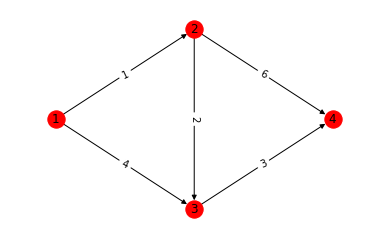

In [47]:
%matplotlib inline
import networkx as nx

def djikstra_naive(DG, source):
    #Naive implementation which does the following
    #
    # 1. For vertices in X, find all edges originating from them to all vertices not in X
    # 2. Keep track of minimum value of len(w) + lwv
    # 3. Return w, v and lwv
    X = [source]
    A = {}
    A[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                dji_greedy = A[edge[0]] + DG.edges[edge[0], edge[1]]['weight'] #djikstra's greedy criterion
                if edge[1] not in A:
                    A[edge[1]] = dji_greedy
                elif dji_greedy < A[edge[1]]:
                    A[edge[1]] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    w_overall = edge[1]  
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
    print("Printing minimum distances from starting vertex {}".format(source))
    for node in A:
        print("Vertex {} is at distance {}".format(node, A[node]))
        
        

DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

djikstra_naive(DG, 1)

Printing minimum distances from starting vertex s
Vertex s is at distance 0
Vertex t is at distance 6
Vertex w is at distance 3
Vertex v is at distance 1


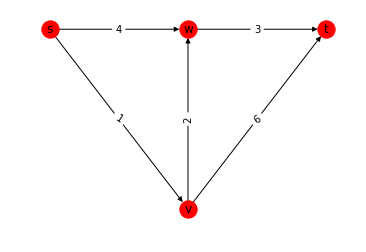

In [48]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
djikstra_naive(g, start_vert)

##### Problem 9.8

Solved earlier.

Printing minimum distances from starting vertex a
Vertex a is at distance 0
Vertex c is at distance -3
Vertex b is at distance 1
Vertex e is at distance 0
Vertex d is at distance -6
Vertex g is at distance -1
Vertex f is at distance -1


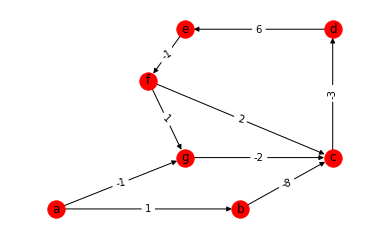

In [49]:
import networkx as nx
g = nx.DiGraph()
g.add_node('a', pos = (0, 5))
g.add_node('b', pos = (10, 5))
g.add_edge('a', 'b', weight = 1)

g.add_node('c', pos = (15, 7))
g.add_edge('b', 'c', weight = -8)

g.add_node('d', pos = (15, 12))
g.add_edge('c', 'd', weight = -3)

g.add_node('e', pos = (7, 12))
g.add_edge('d', 'e', weight = 6)

g.add_node('f', pos = (5, 10))
g.add_edge('e', 'f', weight = -1)
g.add_edge('f', 'c', weight = 2)

g.add_node('g', pos = (7, 7))
g.add_edge('f', 'g', weight = 1)
g.add_edge('g', 'c', weight = -2)
g.add_edge('a', 'g', weight = -1)

pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

djikstra_naive(g, 'a')

As we see in the above graph, we have two directed cycles g -> c -> d -> e -> f -> g and c -> d -> e -> f -> c. Both have non negative sum of lengths. Still, the shortest distance using Djikstra algorithm for c will be calculated as -3 where the true shortest distance is -7. All vertices that gets pulled into frontier after c will be incorrect. For the above graph, except g and b, the distances will be incorrect. Following code snippet demonstrates the incorrect path lengths


## More Problems

**Problem 1: ** <br>
In lecture we define the length of a path to be the sum of the lengths of its edges. Define the bottleneck of a path to be the maximum length of one of its edges. A mininum-bottleneck path between two vertices s and t is a path with bottleneck no larger than that of any other s-t path. Show how to modify Dijkstra's algorithm to compute a minimum-bottleneck path between two given vertices. The running time should be $O(m \log n)$, as in lecture.


    The running time should be O(m logn), as in lecture.
    First we have implemented it using a loop over nodes and edges to get an  O(m n) implementation.
    Later, we will use heap datastructure to get O(m logn) running time.

Printing minimum-bottleneck path from starting vertex 1
Vertex 1 has a minimum-bottleneck of 0 having path ['1']
Vertex 2 has a minimum-bottleneck of 1 having path ['1', '2']
Vertex 3 has a minimum-bottleneck of 2 having path ['1', '2', '3']
Vertex 4 has a minimum-bottleneck of 3 having path ['1', '2', '3', '4']


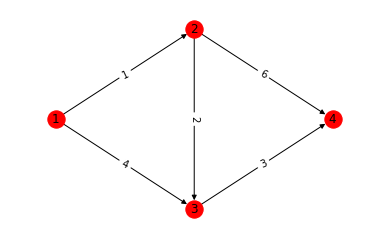

In [91]:
%matplotlib inline
import networkx as nx

def minimum_bottleneck_path_naive(DG, source):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                dji_greedy = DG.edges[edge[0], edge[1]]['weight'] #bottleneck criterion
                if edge[1] not in A:
                    A[edge[1]] = dji_greedy
                    bottleneck[edge[1]] = dji_greedy
                    #print("from bottleneck[{}] = {} ,to bottleneck[{}] = {}".format(edge[0] , bottleneck[edge[0]], edge[1] , bottleneck[edge[1]]))
                elif dji_greedy < A[edge[1]]:
                    A[edge[1]] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge[0]]:
                        bottleneck[edge[1]] = dji_greedy
                        #print("from bottleneck[{}] = {} ,to bottleneck[{}] = {}".format(edge[0] , bottleneck[edge[0]], edge[1] , bottleneck[edge[1]]))
                    else:
                        bottleneck[edge[1]] = bottleneck[edge[0]]
                    w_overall = edge[1] 
                    v_overall = edge[0] 
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        
    print("Printing minimum-bottleneck path from starting vertex {}".format(source))
    for node in A:
        print("Vertex {} has a minimum-bottleneck of {} having path {}".format(node, bottleneck[node], B[node].split(',')))
        
        

DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

minimum_bottleneck_path_naive(DG, 1)

Printing minimum-bottleneck path from starting vertex s
Vertex s has a minimum-bottleneck of 0 having path ['s']
Vertex t has a minimum-bottleneck of 3 having path ['s', 'v', 'w', 't']
Vertex w has a minimum-bottleneck of 2 having path ['s', 'v', 'w']
Vertex v has a minimum-bottleneck of 1 having path ['s', 'v']


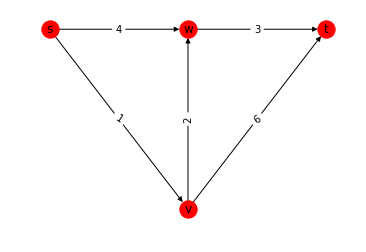

In [109]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
minimum_bottleneck_path_naive(g, start_vert)

In [110]:
start_vert = 'v'
minimum_bottleneck_path_naive(g, start_vert)

Printing minimum-bottleneck path from starting vertex v
Vertex t has a minimum-bottleneck of 3 having path ['v', 'w', 't']
Vertex w has a minimum-bottleneck of 2 having path ['v', 'w']
Vertex v has a minimum-bottleneck of 0 having path ['v']


Printing minimum-bottleneck path from starting vertex s
Vertex a has a minimum-bottleneck of 5 having path ['s', 'a']
Vertex c has a minimum-bottleneck of 5 having path ['s', 'a', 'b', 'c']
Vertex b has a minimum-bottleneck of 5 having path ['s', 'a', 'b']
Vertex e has a minimum-bottleneck of 9 having path ['s', 'd', 'e']
Vertex d has a minimum-bottleneck of 8 having path ['s', 'd']
Vertex g has a minimum-bottleneck of 4 having path ['s', 'g']
Vertex f has a minimum-bottleneck of 5 having path ['s', 'a', 'f']
Vertex i has a minimum-bottleneck of 20 having path ['s', 'g', 'h', 'i']
Vertex h has a minimum-bottleneck of 20 having path ['s', 'g', 'h']
Vertex s has a minimum-bottleneck of 0 having path ['s']
Vertex t has a minimum-bottleneck of 5 having path ['s', 'a', 'f', 't']


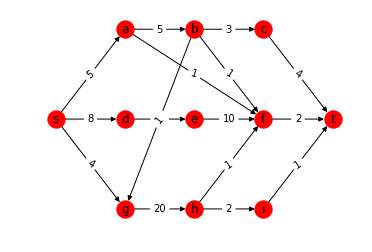

In [119]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
minimum_bottleneck_path_naive(g, start_vert)

**Problem 2: ** <br>
We can do better. Suppose now that the graph is undirected. Give a linear-time ($O(m)$) algorithm to compute a minimum-bottleneck path between two given vertices.

Printing minimum-bottleneck path from starting vertex v
Vertex s has a minimum-bottleneck of 1 having path ['v', 's']
Vertex t has a minimum-bottleneck of 3 having path ['v', 'w', 't']
Vertex w has a minimum-bottleneck of 2 having path ['v', 'w']
Vertex v has a minimum-bottleneck of 0 having path ['v']


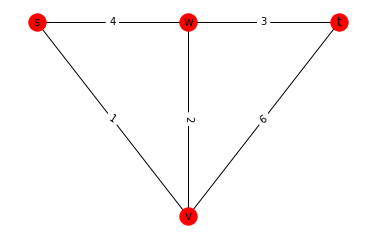

In [139]:
%matplotlib inline
import networkx as nx

def undirected_minimum_bottleneck_path_naive(DG, source):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] in X) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            if ((edge[0] in X) and (edge[1] not in X))  or ((edge[1] in X) and (edge[0] not in X)):
                dji_greedy = DG.edges[edge_tail, edge_head]['weight'] #bottleneck criterion
                if edge_head not in A:
                    A[edge_head] = dji_greedy
                    bottleneck[edge_head] = dji_greedy
                elif dji_greedy < A[edge_head]:
                    A[edge_head] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge_tail]:
                        bottleneck[edge_head] = dji_greedy
                    else:
                        bottleneck[edge_head] = bottleneck[edge_tail]
                    w_overall = edge_head 
                    v_overall = edge_tail
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        
    print("Printing minimum-bottleneck path from starting vertex {}".format(source))
    for node in A:
        print("Vertex {} has a minimum-bottleneck of {} having path {}".format(node, bottleneck[node], B[node].split(',')))
        
        

UDG = nx.Graph()
UDG.add_node('s', pos = (0, 5))
UDG.add_node('v', pos = (5, 0))
UDG.add_node('w', pos = (5, 5))
UDG.add_node('t', pos = (10, 5))
UDG.add_edge('s', 'v', weight = 1)
UDG.add_edge('v', 't', weight = 6)
UDG.add_edge('s', 'w', weight = 4)
UDG.add_edge('v', 'w', weight = 2)
UDG.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(UDG, 'pos')
weights =nx.get_edge_attributes(UDG, 'weight')
nx.draw_networkx_edge_labels(UDG, pos, edge_labels = weights)
nx.draw(UDG, pos, with_labels = True)

undirected_minimum_bottleneck_path_naive(UDG, 'v')


Printing minimum-bottleneck path from starting vertex s
Vertex a has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 'a']
Vertex c has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'c']
Vertex b has a minimum-bottleneck of 4 having path ['s', 'g', 'b']
Vertex e has a minimum-bottleneck of 9 having path ['s', 'd', 'e']
Vertex d has a minimum-bottleneck of 8 having path ['s', 'd']
Vertex g has a minimum-bottleneck of 4 having path ['s', 'g']
Vertex f has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f']
Vertex i has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 't', 'i']
Vertex h has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 'h']
Vertex s has a minimum-bottleneck of 0 having path ['s']
Vertex t has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 't']


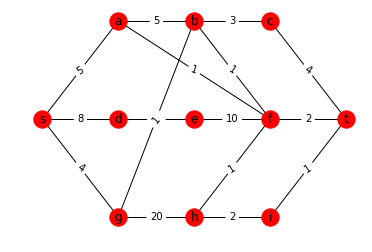

In [140]:
UDg = g.to_undirected()
pos = nx.get_node_attributes(UDg, 'pos')
weights =nx.get_edge_attributes(UDg, 'weight')
nx.draw_networkx_edge_labels(UDg, pos, edge_labels = weights)
nx.draw(UDg, pos, with_labels = True)

undirected_minimum_bottleneck_path_naive(UDg, 's')


Printing minimum-bottleneck path from source vertex v to destination vertex t
Route v -> t has a minimum-bottleneck of 3 having path ['v', 'w', 't']


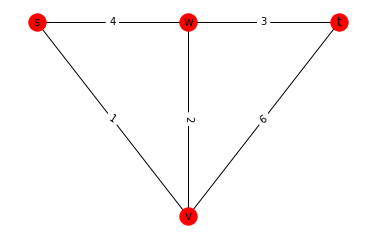

In [147]:
%matplotlib inline
import networkx as nx

def undirected_minimum_bottleneck_route_naive(DG, source, destination):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] in X) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            if ((edge[0] in X) and (edge[1] not in X))  or ((edge[1] in X) and (edge[0] not in X)):
                dji_greedy = DG.edges[edge_tail, edge_head]['weight'] #bottleneck criterion
                if edge_head not in A:
                    A[edge_head] = dji_greedy
                    bottleneck[edge_head] = dji_greedy
                elif dji_greedy < A[edge_head]:
                    A[edge_head] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge_tail]:
                        bottleneck[edge_head] = dji_greedy
                    else:
                        bottleneck[edge_head] = bottleneck[edge_tail]
                    w_overall = edge_head 
                    v_overall = edge_tail
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        if w_overall == destination:
            break
        
    print("Printing minimum-bottleneck path from source vertex {} to destination vertex {}".format(source, destination))
    for node in A:
        if node == destination:
            print("Route {} -> {} has a minimum-bottleneck of {} having path {}".format(source, destination, bottleneck[node], B[node].split(',')))
        
        

UDG = nx.Graph()
UDG.add_node('s', pos = (0, 5))
UDG.add_node('v', pos = (5, 0))
UDG.add_node('w', pos = (5, 5))
UDG.add_node('t', pos = (10, 5))
UDG.add_edge('s', 'v', weight = 1)
UDG.add_edge('v', 't', weight = 6)
UDG.add_edge('s', 'w', weight = 4)
UDG.add_edge('v', 'w', weight = 2)
UDG.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(UDG, 'pos')
weights =nx.get_edge_attributes(UDG, 'weight')
nx.draw_networkx_edge_labels(UDG, pos, edge_labels = weights)
nx.draw(UDG, pos, with_labels = True)

undirected_minimum_bottleneck_route_naive(UDG, 'v', 't')



Printing minimum-bottleneck path from source vertex s to destination vertex a
Route s -> a has a minimum-bottleneck of 4 having path ['s', 'g', 'b', 'f', 'a']


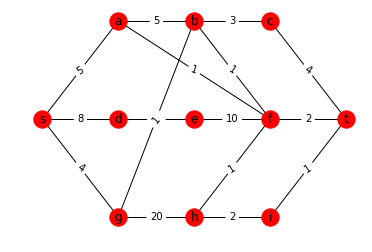

In [134]:
UDg = g.to_undirected()
pos = nx.get_node_attributes(UDg, 'pos')
weights =nx.get_edge_attributes(UDg, 'weight')
nx.draw_networkx_edge_labels(UDg, pos, edge_labels = weights)
nx.draw(UDg, pos, with_labels = True)

undirected_minimum_bottleneck_route_naive(UDg, 's', 'a')




**Problem 3: ** <br>
What if the graph is directed? Can you compute a minimum-bottleneck path between two given vertices faster than $O(m \log n)$ ?

Printing minimum-bottleneck path from starting vertex s
Route s -> a has a minimum-bottleneck of 5 having path ['s', 'a']


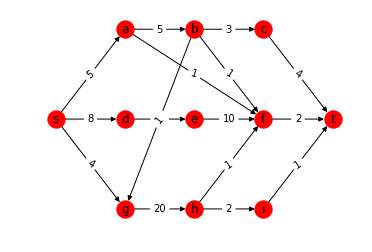

In [135]:
%matplotlib inline
import networkx as nx

def minimum_bottleneck_route_naive(DG, source, destination):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                dji_greedy = DG.edges[edge[0], edge[1]]['weight'] #bottleneck criterion
                if edge[1] not in A:
                    A[edge[1]] = dji_greedy
                    bottleneck[edge[1]] = dji_greedy
                    #print("from bottleneck[{}] = {} ,to bottleneck[{}] = {}".format(edge[0] , bottleneck[edge[0]], edge[1] , bottleneck[edge[1]]))
                elif dji_greedy < A[edge[1]]:
                    A[edge[1]] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge[0]]:
                        bottleneck[edge[1]] = dji_greedy
                        #print("from bottleneck[{}] = {} ,to bottleneck[{}] = {}".format(edge[0] , bottleneck[edge[0]], edge[1] , bottleneck[edge[1]]))
                    else:
                        bottleneck[edge[1]] = bottleneck[edge[0]]
                    w_overall = edge[1] 
                    v_overall = edge[0] 
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        if w_overall == destination:
            break
        
    print("Printing minimum-bottleneck path from starting vertex {}".format(source))
    for node in A:
        if node == destination:
            print("Route {} -> {} has a minimum-bottleneck of {} having path {}".format(source, destination, bottleneck[node], B[node].split(',')))        
        

DG = nx.DiGraph()
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
dest_vert = 'a'
minimum_bottleneck_route_naive(g, start_vert, dest_vert)


# Challenging problem

In this programming problem you'll code up Dijkstra's shortest-path algorithm.

Download the following text file: dijkstraData.txt

The file contains an adjacency list representation of an undirected weighted graph with 200 vertices labeled 1 to 200. Each row consists of the node tuples that are adjacent to that particular vertex along with the length of that edge. For example, the 6th row has 6 as the first entry indicating that this row corresponds to the vertex labeled 6. The next entry of this row "141,8200" indicates that there is an edge between vertex 6 and vertex 141 that has length 8200. The rest of the pairs of this row indicate the other vertices adjacent to vertex 6 and the lengths of the corresponding edges.

Your task is to run Dijkstra's shortest-path algorithm on this graph, using 1 (the first vertex) as the source vertex, and to compute the shortest-path distances between 1 and every other vertex of the graph. If there is no path between a vertex vv and vertex 1, we'll define the shortest-path distance between 1 and vv to be 1000000.

You should report the shortest-path distances to the following ten vertices, in order: 7,37,59,82,99,115,133,165,188,197. You should encode the distances as a comma-separated string of integers. So if you find that all ten of these vertices except 115 are at distance 1000 away from vertex 1 and 115 is 2000 distance away, then your answer should be 1000,1000,1000,1000,1000,2000,1000,1000,1000,1000. Remember the order of reporting DOES MATTER, and the string should be in the same order in which the above ten vertices are given.

IMPLEMENTATION NOTES: This graph is small enough that the straightforward $O(mn)$ time implementation of Dijkstra's algorithm should work fine. OPTIONAL: For those of you seeking an additional challenge, try implementing the heap-based version. Note this requires a heap that supports deletions, and you'll probably need to maintain some kind of mapping between vertices and their positions in the heap.

Printing minimum distances from starting vertex s
Vertex a is at distance 5
Vertex e is at distance 16
Vertex i is at distance 9
Vertex t is at distance 8


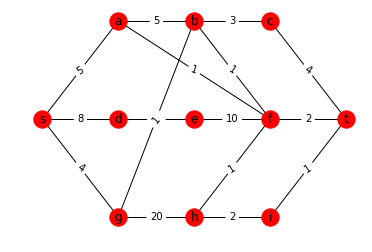

In [148]:
%matplotlib inline
import networkx as nx

def undirected_djikstra_naive(DG, source, destination):
    X = [source]
    A = {}
    A[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                edge_tail = edge[0]
                edge_head = edge[1]
            elif (edge[1] in X) and (edge[0] not in X):
                edge_tail = edge[1]
                edge_head = edge[0]
            if ((edge_tail in X) and (edge_head not in X)) :
                dji_greedy = A[edge_tail] + DG.edges[edge_tail, edge_head]['weight'] #djikstra's greedy criterion
                if edge_head not in A:
                    A[edge_head] = dji_greedy
                elif dji_greedy < A[edge_head]:
                    A[edge_head] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    w_overall = edge_head  
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
    print("Printing minimum distances from starting vertex {}".format(source))
    for node in A:
        if node in destination:
            print("Vertex {} is at distance {}".format(node, A[node]))
        
        


pos = nx.get_node_attributes(UDg, 'pos')
weights =nx.get_edge_attributes(UDg, 'weight')
nx.draw_networkx_edge_labels(UDg, pos, edge_labels = weights)
nx.draw(UDg, pos, with_labels = True)


dest_verts = ['e', 'i', 't', 'a']
undirected_djikstra_naive(UDg, 's', dest_verts)

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Printing minimum distances from starting vertex 1
Vertex 7 is at distance 2599
Vertex 37 is at distance 2610
Vertex 59 is at distance 2947
Vertex 82 is at distance 2052
Vertex 99 is at distance 2367
Vertex 115 is at distance 2399
Vertex 133 is at distance 2029
Vertex 165 is at distance 2442
Vertex 188 is at distance 2505
Vertex 197 is at distance 3068


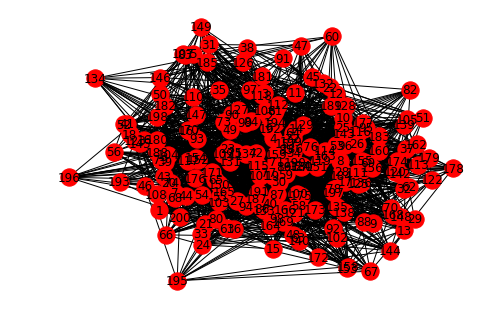

In [178]:
import urllib3


challenge_graph = nx.Graph()
# Test case
http = urllib3.PoolManager()
r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_dcf1d02570e57d23ab526b1e33ba6f12_dijkstraData.txt?Expires=1561680000&Signature=bV83LJBixgMSvZDBZ3xlenOdKmMhtzyXSviQXgBWiRz88G4kU658KDq~bHTme-5nIj34ymaAKRS7T7Wjn~tlMRhQNI0eZXB9af7nyqbpXn7RS8Gm7YJ4KYT7URzlD9ZpX-CzGTWCo446BiY05xXpq2l6ewCOf8tu6G4QsfJvOIA_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
IntegerMatrixStringJoin = r1.data.split('\r\n')
IntegerMatrixStringJoin.remove('')
edges = []
for i in IntegerMatrixStringJoin:
    node_edges = i.split('\t')
    sourceint = int(node_edges[0])
    dest_list = node_edges[1:-1]
    challenge_graph = nx.Graph()
    for edstr in dest_list:
        edlist = edstr.split(',')
        destint = int(edlist[0])
        edgeweight = int(edlist[1])
        edges.append((sourceint, destint, edgeweight))
challenge_graph.add_weighted_edges_from(edges)
nx.draw(challenge_graph, with_labels = True)
    
dest_verts = [7,37,59,82,99,115,133,165,188,197]
undirected_djikstra_naive(challenge_graph, 1 , dest_verts)


Ans:  2599,2610,2947,2052,2367,2399,2029,2442,2505,3068